In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB


In [7]:
data=pd.read_csv("C:\\Users\\sidbh\\Downloads\\Breast_cancer_data.csv")

In [8]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


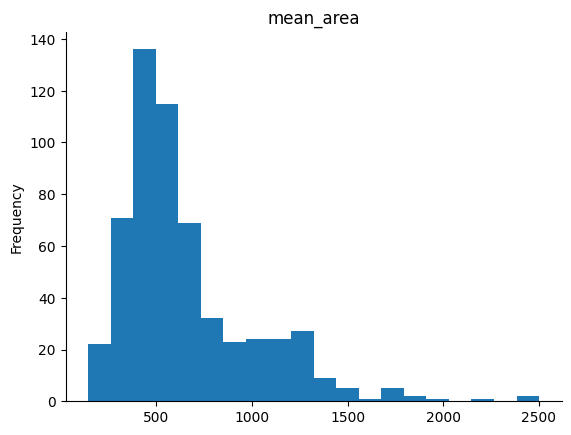

In [9]:
# @title mean_area

from matplotlib import pyplot as plt
data['mean_area'].plot(kind='hist', bins=20, title='mean_area')
plt.gca().spines[['top', 'right',]].set_visible(False)

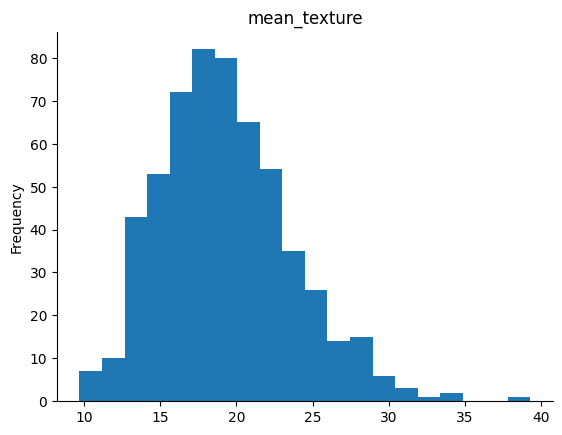

In [10]:
# @title mean_texture

from matplotlib import pyplot as plt
data['mean_texture'].plot(kind='hist', bins=20, title='mean_texture')
plt.gca().spines[['top', 'right',]].set_visible(False)

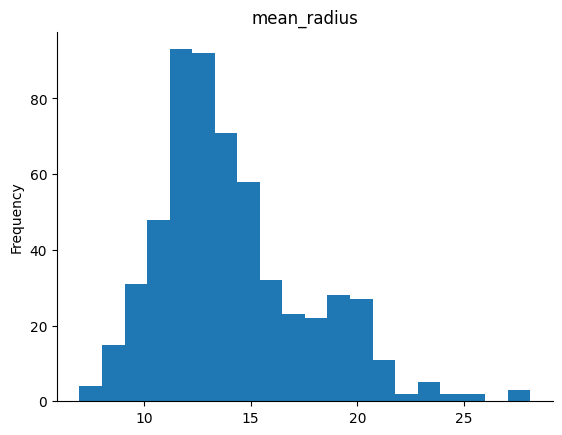

In [11]:
# @title mean_radius

from matplotlib import pyplot as plt
data['mean_radius'].plot(kind='hist', bins=20, title='mean_radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

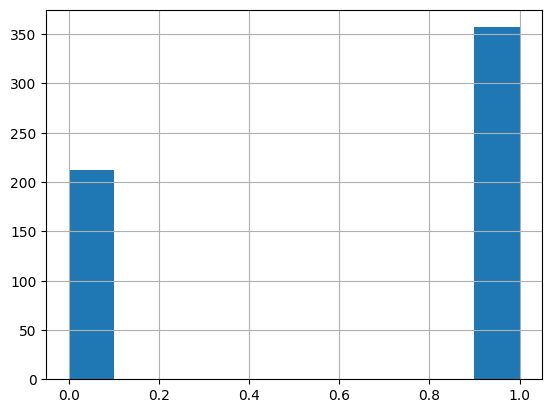

In [12]:
data["diagnosis"].hist()

In [13]:
corr = data.iloc[:,:-1].corr(method = 'pearson')
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


<Axes: >

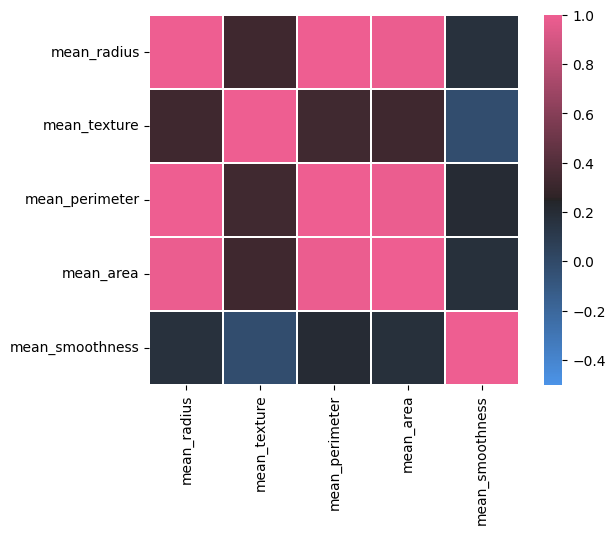

In [14]:
cmap = sns.diverging_palette(250,354,80,60, center = 'dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin= -.5, cmap =cmap, square = True, linewidths=.2)

In [15]:
data=data[["mean_radius", "mean_texture", "mean_area"]]
data.head()

,mean_radius,mean_texture,mean_area
0,17.99,10.38,1001.0
1,20.57,17.77,1326.0
2,19.69,21.25,1203.0
3,11.42,20.38,386.1
4,20.29,14.34,1297.0


In [20]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data, test_size=0.2, random_state=42)
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [24]:
model = GaussianNB()
model.fit(x_train, y_train)


ValueError: Unknown label type: (array([ 170.4,  181. ,  201.9,  203.9,  221.2,  221.3,  221.8,  224.5,
        227.2,  230.9,  234.3,  241. ,  244. ,  244.5,  245.2,  246.3,
        248.7,  250.5,  260.9,  264. ,  268.8,  269.4,  271.2,  272.5,
        273.9,  278.6,  279.6,  280.5,  285.7,  286.3,  288.1,  289.1,
        289.9,  290.9,  293.2,  294.5,  295.4,  298.3,  300.2,  302.4,
        310.8,  311.9,  317.5,  320.8,  321.2,  321.6,  324.9,  329.6,
        333.6,  334.2,  334.3,  337.7,  338.3,  340.9,  344.9,  346.4,
        347. ,  349.6,  357.6,  358.9,  359.9,  360.5,  361.6,  363.7,
        365.6,  366.5,  366.8,  370. ,  371.1,  371.5,  372.7,  373.2,
        373.9,  378.2,  380.3,  381.1,  384.6,  384.8,  386.1,  386.8,
        388.1,  389.4,  391.2,  392. ,  394.1,  395.7,  396. ,  396.6,
        398. ,  399.8,  401.5,  402. ,  402.7,  403.1,  403.3,  403.5,
        404.9,  406.4,  407.4,  408.8,  409.1,  409.7,  412.5,  412.6,
        412.7,  415.1,  418.7,  419.8,  420.3,  420.5,  421. ,  423.6,
        426. ,  426.7,  427.9,  431.1,  431.9,  432. ,  432.2,  432.7,
        433.8,  437.6,  438.6,  440.6,  441. ,  441.3,  442.5,  442.7,
        445.2,  445.3,  446. ,  449.3,  449.9,  451.1,  453.1,  455.3,
        455.8,  457.9,  458.4,  458.7,  460.3,  461. ,  461.4,  462. ,
        462.9,  463.7,  464.1,  465.4,  466.1,  466.5,  466.7,  469.1,
        470.9,  471.3,  476.3,  476.5,  476.7,  477.1,  477.3,  477.4,
        480.1,  480.4,  481.6,  485.6,  485.8,  489. ,  489.9,  491.9,
        492.1,  492.9,  493.1,  493.8,  495. ,  499. ,  501.3,  502.5,
        503.2,  504.1,  506.3,  506.9,  507.4,  507.6,  507.9,  508.3,
        508.8,  509.2,  512. ,  512.2,  513.7,  514.3,  514.5,  515.9,
        516.4,  519.4,  519.8,  520. ,  520.2,  523.8,  525.2,  526.4,
        527.2,  530.2,  530.6,  531.5,  534.6,  536.9,  537.3,  538.4,
        538.7,  538.9,  541.6,  542.9,  545.2,  546.1,  546.4,  551.7,
        552.4,  553.5,  555.1,  556.7,  557.2,  558.1,  561. ,  561.3,
        562.1,  563. ,  565.4,  566.2,  566.3,  568.9,  571. ,  571.1,
        571.8,  572.3,  572.6,  573.2,  575.3,  577.9,  578.3,  578.9,
        579.1,  580.6,  582.7,  584.8,  585. ,  585.9,  587.4,  588.7,
        590. ,  592.6,  593.7,  595.9,  596.6,  599.5,  600.4,  602.9,
        606.5,  609.9,  610.7,  611.2,  616.5,  618.4,  629.8,  629.9,
        632.6,  633. ,  633.1,  640.7,  641.2,  642.5,  642.7,  644.2,
        644.8,  645.7,  651. ,  651.9,  656.1,  656.4,  656.9,  657.1,
        658.8,  659.7,  664.7,  664.9,  668.3,  668.6,  668.7,  671.4,
        673.7,  674.5,  674.8,  678.1,  680.9,  682.5,  684.5,  685. ,
        685.9,  686.9,  687.3,  689.5,  693.7,  698.8,  701.9,  704.4,
        705.6,  710.6,  711.8,  712.8,  716.6,  716.9,  719.5,  725.5,
        728.2,  731.3,  732.4,  736.9,  744.7,  744.9,  747.2,  758.6,
        761.3,  761.7,  773.5,  782.7,  788.5,  793.2,  798.8,  800. ,
        803.1,  805.1,  807.2,  813. ,  813.7,  815.8,  819.8,  838.1,
        840.4,  857.6,  858.1,  869.5,  880.2,  895. ,  899.3,  904.3,
        904.6,  912.7,  918.6,  920.6,  928.2,  930.9,  933.1,  947.8,
        948. ,  951.6,  963.7,  981.6,  982. ,  984.6,  990. ,  992.1,
        994. , 1001. , 1007. , 1024. , 1027. , 1033. , 1041. , 1052. ,
       1068. , 1075. , 1076. , 1077. , 1092. , 1094. , 1102. , 1104. ,
       1110. , 1123. , 1138. , 1145. , 1148. , 1152. , 1155. , 1157. ,
       1162. , 1167. , 1169. , 1174. , 1191. , 1192. , 1194. , 1206. ,
       1207. , 1214. , 1217. , 1223. , 1230. , 1234. , 1247. , 1250. ,
       1260. , 1264. , 1274. , 1288. , 1290. , 1293. , 1297. , 1299. ,
       1306. , 1311. , 1319. , 1320. , 1326. , 1335. , 1347. , 1384. ,
       1386. , 1404. , 1491. , 1509. , 1546. , 1670. , 1685. , 1686. ,
       1747. , 1761. , 1841. , 2010. , 2250. , 2499. , 2501. ]),)

In [18]:
y_pred = model.predict(x_test)

NameError: name 'y_pred' is not defined

In [25]:
CM = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

NameError: name 'y_pred' is not defined

In [ ]:
CM

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
f1

0.0006049606775559587